<img src='st1.jpg'>
<img src='st2.jpg'>
<img src='st3.jpg'>
<img src='st4.jpg'>

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('data/ch4_scores400.csv')

df.shape

scores=np.array(df['score'])


,score
0,76
1,55
2,80
3,80
4,74
...,...
395,77
396,60
397,83
398,80


In [199]:
#복원추출
np.random.choice([1,2,3],3)

array([3, 1, 3])

In [219]:
#비복원추출
np.random.choice([1,2,3],3,replace=False)

array([3, 2, 1])

In [224]:
np.random.seed(0)
sample=np.random.choice(scores,20)
sample.mean()

70.4

In [222]:
scores.mean()

69.53

In [270]:
for i in range(5):
    sample=np.random.choice(scores,20)
    print(sample)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균:',sample.mean())

[71 54 67 78 54 82 58 31 42 68 81 64 57 86 86 77 69 58 82 45]
1번째 무작위 추출로 얻은 
표본평균: 65.5
[64 61 61 72 61 81 63 43 64 79 70 66 57 76 76 58 97 73 54 93]
2번째 무작위 추출로 얻은 
표본평균: 68.45
[72 58 56 63 80 79 76 82 73 57 54 74 99 76 80 62 58 79 45 87]
3번째 무작위 추출로 얻은 
표본평균: 70.5
[74 67 75 78 83 76 54 64 83 67 91 64 78 83 86 91 96 81 70 58]
4번째 무작위 추출로 얻은 
표본평균: 75.95
[55 90 79 43 82 56 94 54 79 86 52 62 85 78 77 64 75 70 78 56]
5번째 무작위 추출로 얻은 
표본평균: 70.75


In [315]:
#확률분포(균형이 안맞는 주사위)
dice=[1,2,3,4,5,6]
prob=[1/21,2/21,3/21,4/21,5/21,6/21]

In [316]:
np.random.choice(dice,p=prob)

4

In [317]:
np.random.seed(1)
num_trial=100
sample=np.random.choice(dice,num_trial,p=prob)
sample

array([4, 6, 1, 4, 3, 2, 3, 4, 4, 5, 4, 5, 3, 6, 1, 5, 4, 5, 2, 3, 6, 6,
       4, 5, 6, 6, 2, 1, 3, 6, 2, 4, 6, 5, 5, 4, 5, 6, 1, 6, 6, 6, 3, 6,
       2, 4, 6, 4, 4, 2, 1, 5, 3, 3, 5, 2, 5, 3, 5, 5, 2, 4, 5, 4, 2, 5,
       5, 5, 6, 5, 6, 2, 2, 6, 4, 3, 6, 4, 6, 6, 6, 5, 6, 4, 3, 6, 4, 6,
       5, 5, 2, 6, 4, 5, 4, 3, 6, 5, 1, 5])

In [318]:
freq,_=np.histogram(sample,bins=6,range=(1,7))
print(freq)
rdf=pd.DataFrame({'frequency':freq,'relative frequency':freq/num_trial},
                 index=pd.Index(np.arange(1,7),name='dice'))
rdf

[ 6 12 12 20 24 26]


,frequency,relative frequency
dice,,
1,6,0.06
2,12,0.12
3,12,0.12
4,20,0.20
5,24,0.24
6,26,0.26


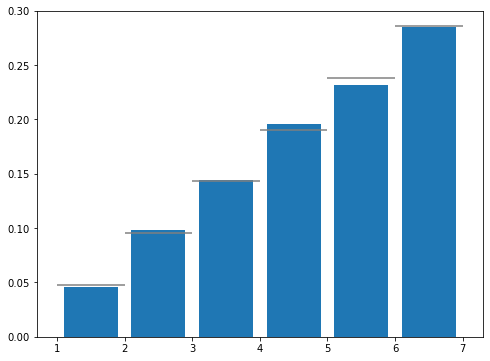

In [326]:
import seaborn as sns
import matplotlib.pyplot as plt

num_trial=10000
sample=np.random.choice(dice,size=num_trial,p=prob)
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.hist(sample,bins=6,range=(1,7),density=True,rwidth=0.8)
ax.hlines(prob,np.arange(1,7),np.arange(2,8),colors='gray')
plt.show()


In [339]:
#추측 통계에서의 확률
df=pd.read_csv('data/ch4_scores400.csv')
scores=np.array(df['score'])


array([ 76,  55,  80,  80,  74,  61,  81,  76,  23,  80,  41,  80,  68,
        88,  69,  57,  68,  86,  70,  68,  81,  73,  70,  90,  93,  79,
        66,  92,  88,  81,  52,  72,  59,  68,  74,  72,  63,  89,  45,
        81,  42,  76,  57,  83,  71,  74,  55,  60,  73,  79, 100,  73,
        85,  47,  50,  65,  52,  92,  64,  91,  92,  71,  78,  69,  78,
        77,  68,  78,  96,  81,  75,  72,  55,  55,  75,  49,  59,  89,
        99,  45,  94,  67,  70,  68,  86,  46,  77,  56,  79,  93,  70,
        76,  76,  58,  93,  96,  81,  71,  63,  61,  96,  91,  69,  46,
        28,  54,  68,  91,  60,  78,  90,  72,  68,  50,  52,  76,  67,
        72,  69,  80,  58,  65,  98,  58,  66,  61,  77,  85,  63,  64,
        66,  78,  59,  64,  34,  49,  68,  83,  74,  54,  49,  73,  45,
        86,  71,  46,  56,  59,  58,  48,  57,  60,  59,  87,  72,  55,
        65,  57,  65,  83,  74, 100,  76,  56,  82,  86,  86,  54,  68,
        87,  45,  63,  49,  56,  55,  89,  66,  57,  54,  72,  7

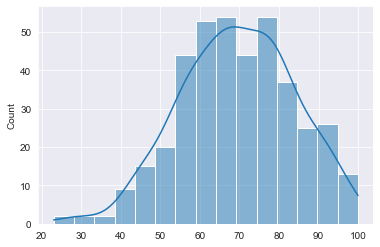

In [353]:
import seaborn as sns
#seaborn 테마 darkgrid, whitegrid,dark,white,ticks
sns.set_style('darkgrid')
sns.histplot(scores,kde=True)
plt.show()

(20.0, 120.0, 0.0, 0.5)

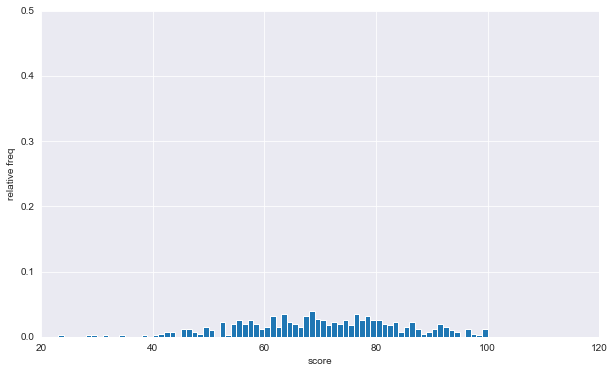

In [359]:
plt.figure(figsize=(10,6))
plt.hist(scores,bins=100,range=(0,100),density=True)
plt.xlabel('score')
plt.ylabel('relative freq')
plt.axis([20,120,0,0.5])